The next cell contains a code snippet used to scrape the twitter data for our experiment.
The code is commented out because the csv file is going to be used for the next tasks, no need to scrape the data again.
The code was executed from local machine and able to scrape the required amount of data.

In [194]:
#pl_query = '(#premierleague) lang:en since:2022-08-06 -filter:links -filter:replies'
#pl_limit = 50000
#pl_file_name = 'premierleague.json'
#since = '2022-08-06'

#def scrape_tweets(query, limit, since, file_name):
#    os.system(f"snscrape --jsonl --max-results {limit} --since {since} twitter-search  '{query}' > {file_name}")

#scrape_tweets(epl_query, epl_limit, since, epl_file_name)

In [162]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import spacy
import nltk
nltk.download("popular")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

import tweepy
import networkx as nx
stop = stopwords.words('english')
%matplotlib inline

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [30]:
# Load the file from the github repository as a zip file and unzip here

!wget https://github.com/HenokZegeye/Datascience-Course/blob/main/premierleague.json.zip?raw=true -O new_epl.zip
! unzip /content/new_epl.zip

--2022-11-08 10:55:55--  https://github.com/HenokZegeye/Datascience-Course/blob/main/premierleague.json.zip?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/HenokZegeye/Datascience-Course/raw/main/premierleague.json.zip [following]
--2022-11-08 10:55:55--  https://github.com/HenokZegeye/Datascience-Course/raw/main/premierleague.json.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HenokZegeye/Datascience-Course/main/premierleague.json.zip [following]
--2022-11-08 10:55:55--  https://raw.githubusercontent.com/HenokZegeye/Datascience-Course/main/premierleague.json.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githu

In [31]:
epl_df = pd.read_json('premierleague.json', lines=True)
epl_df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/Henryja36007142/status/158...,2022-10-27 09:04:53+00:00,2x for Arsenal vs Nottingham Forest tickets st...,2x for Arsenal vs Nottingham Forest tickets st...,1585558141634215936,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,None,None,None,"[arsenal, COYG, PremierLeague, AFC]",None
1,snscrape.modules.twitter.Tweet,https://twitter.com/WorldCupLimerix/status/158...,2022-10-27 09:01:19+00:00,There once was a player called Walker\nWhose w...,There once was a player called Walker\nWhose w...,1585557241268240387,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,None,None,None,"[FIFAWorldCup, ManCity, KyleWalker, PremierLea...",None
2,snscrape.modules.twitter.Tweet,https://twitter.com/benj011883/status/15855571...,2022-10-27 09:00:58+00:00,I’ve got spare tickets for Liverpool v Leeds a...,I’ve got spare tickets for Liverpool v Leeds a...,1585557155603701760,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,None,None,None,"[LiverpoolFC, PremierLeague, Anfield, EPL, Anf...",None
3,snscrape.modules.twitter.Tweet,https://twitter.com/Henryja36007142/status/158...,2022-10-27 08:58:01+00:00,2x for Arsenal vs Nottingham Forest tickets st...,2x for Arsenal vs Nottingham Forest tickets st...,1585556412733743105,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,0,...,NaN,NaN,NaN,NaN,NaN,None,None,None,"[arsenal, COYG, PremierLeague, AFC]",None
4,snscrape.modules.twitter.Tweet,https://twitter.com/CowanGillies/status/158555...,2022-10-27 08:51:55+00:00,I’m selling my 2x tickets for liverpool fc Vs...,I’m selling my 2x tickets for liverpool fc Vs...,1585554878943961088,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,None,None,None,"[Liv, Liverpool, Leeds, Premierleague]",None


Data cleaning

The next method remove some of the tweets which are not related to football or not useful for our tasks

In [32]:
def remove_unnecessary(data):
    df_1 = data[~data.content.str.contains("Predictions|cricket|tickets")]
    return df_1.drop_duplicates(subset=['content'])

In [33]:
epl_df = remove_unnecessary(epl_df)

In [34]:
epl_df['username'] = epl_df.user.apply(lambda  x: x['username'])
epl_df['user_location'] = epl_df.user.apply(lambda x: x['location'])
epl_df['user_display_name'] = epl_df.user.apply(lambda x: x['displayname'])

In [35]:
epl_df = epl_df.loc[:,['date', 'content', 'hashtags', 'username', 'user_display_name', 'user_location']]
epl_df.head()

,date,content,hashtags,username,user_display_name,user_location
1,2022-10-27 09:01:19+00:00,There once was a player called Walker\nWhose w...,"[FIFAWorldCup, ManCity, KyleWalker, PremierLea...",WorldCupLimerix,Rick O'Limm,
13,2022-10-27 08:13:18+00:00,I have 2x ticket for sale on Arsenal vs Nottin...,"[Arsenal, PremierLeague, Ticketmaster, Notting...",keithmat3,Keith Mati😎,"York, England"
15,2022-10-27 07:48:35+00:00,I got a single pare ticket for Liverpool vs Le...,"[LiverpoolFC, LeedsUnited, PremierLeague]",rouful3631,Rouful Moula,
16,2022-10-27 07:30:39+00:00,FE's PREMIER LEAGUE TEAM OF THE WEEK.[GW13]\nT...,"[PremierLeague, PL, footballextra]",football_extra,Football Extra,
17,2022-10-27 07:27:06+00:00,Can we get rid of VAR before it ruins football...,"[BANVAR, NOVAR, PREM, PremierLeague]",davirobinson,David Robinson,


In [36]:
epl_df.shape

(48841, 6)

In [37]:
def clean_tweet(tweet):
    text = str(tweet).encode('ascii', 'ignore').decode('UTF-8').lower()
    text = re.sub('RT @[\w]*: ', '', text)
    text = re.sub('@[\w]*', '', text)
    text = re.sub('#[\w]*', '', text)
    text = re.sub('https?://[A-Za-z0-9./]*', '', text)
    text = re.sub('\n', '', text)
    return text

In [38]:
epl_df.content = epl_df.content.apply(lambda x: clean_tweet(x))
epl_df.head()

,date,content,hashtags,username,user_display_name,user_location
1,2022-10-27 09:01:19+00:00,there once was a player called walkerwhose wif...,"[FIFAWorldCup, ManCity, KyleWalker, PremierLea...",WorldCupLimerix,Rick O'Limm,
13,2022-10-27 08:13:18+00:00,i have 2x ticket for sale on arsenal vs nottin...,"[Arsenal, PremierLeague, Ticketmaster, Notting...",keithmat3,Keith Mati😎,"York, England"
15,2022-10-27 07:48:35+00:00,i got a single pare ticket for liverpool vs le...,"[LiverpoolFC, LeedsUnited, PremierLeague]",rouful3631,Rouful Moula,
16,2022-10-27 07:30:39+00:00,fe's premier league team of the week.[gw13]tho...,"[PremierLeague, PL, footballextra]",football_extra,Football Extra,
17,2022-10-27 07:27:06+00:00,can we get rid of var before it ruins football...,"[BANVAR, NOVAR, PREM, PremierLeague]",davirobinson,David Robinson,


In [39]:
epl_df['tokens'] = epl_df.content.apply(TweetTokenizer().tokenize)
epl_df['stopwords'] = epl_df.tokens.apply(lambda x: [i for i in x if i.lower() not in stop])
punctuations = list(string.punctuation)
epl_df['punctuation'] = epl_df.stopwords.apply(lambda x: [i for i in x if i not in punctuations])
epl_df['digits'] = epl_df.punctuation.apply(lambda x: [i for i in x if i[0] not in list(string.digits)])
epl_df['cleaned_content'] = epl_df.digits.apply(lambda x: ' '.join([i for i in x if len(i) > 1]))
epl_df.head()

,date,content,hashtags,username,user_display_name,user_location,tokens,stopwords,punctuation,digits,cleaned_content
1,2022-10-27 09:01:19+00:00,there once was a player called walkerwhose wif...,"[FIFAWorldCup, ManCity, KyleWalker, PremierLea...",WorldCupLimerix,Rick O'Limm,,"[there, once, was, a, player, called, walkerwh...","[player, called, walkerwhose, wife, bit, porke...","[player, called, walkerwhose, wife, bit, porke...","[player, called, walkerwhose, wife, bit, porke...",player called walkerwhose wife bit porkeron di...
13,2022-10-27 08:13:18+00:00,i have 2x ticket for sale on arsenal vs nottin...,"[Arsenal, PremierLeague, Ticketmaster, Notting...",keithmat3,Keith Mati😎,"York, England","[i, have, 2x, ticket, for, sale, on, arsenal, ...","[2x, ticket, sale, arsenal, vs, nottingham, fo...","[2x, ticket, sale, arsenal, vs, nottingham, fo...","[ticket, sale, arsenal, vs, nottingham, forest...",ticket sale arsenal vs nottingham forest match...
15,2022-10-27 07:48:35+00:00,i got a single pare ticket for liverpool vs le...,"[LiverpoolFC, LeedsUnited, PremierLeague]",rouful3631,Rouful Moula,,"[i, got, a, single, pare, ticket, for, liverpo...","[got, single, pare, ticket, liverpool, vs, lee...","[got, single, pare, ticket, liverpool, vs, lee...","[got, single, pare, ticket, liverpool, vs, lee...",got single pare ticket liverpool vs leeds game...
16,2022-10-27 07:30:39+00:00,fe's premier league team of the week.[gw13]tho...,"[PremierLeague, PL, footballextra]",football_extra,Football Extra,,"[fe's, premier, league, team, of, the, week, ....","[fe's, premier, league, team, week, ., [, gw13...","[fe's, premier, league, team, week, gw13, thou...","[fe's, premier, league, team, week, gw13, thou...",fe's premier league team week gw13 thoughts gk...
17,2022-10-27 07:27:06+00:00,can we get rid of var before it ruins football...,"[BANVAR, NOVAR, PREM, PremierLeague]",davirobinson,David Robinson,,"[can, we, get, rid, of, var, before, it, ruins...","[get, rid, var, ruins, football, ., longer, ce...","[get, rid, var, ruins, football, longer, celeb...","[get, rid, var, ruins, football, longer, celeb...",get rid var ruins football longer celebrate go...


Calculating Sentiment Scores

In [41]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [42]:
sentiment = SentimentIntensityAnalyzer()
epl_df['sentiment'] = epl_df.cleaned_content.apply(lambda x:sentiment.polarity_scores(x)['compound'])

In [43]:
epl_df.head()

,date,content,hashtags,username,user_display_name,user_location,tokens,stopwords,punctuation,digits,cleaned_content,sentiment
1,2022-10-27 09:01:19+00:00,there once was a player called walkerwhose wif...,"[FIFAWorldCup, ManCity, KyleWalker, PremierLea...",WorldCupLimerix,Rick O'Limm,,"[there, once, was, a, player, called, walkerwh...","[player, called, walkerwhose, wife, bit, porke...","[player, called, walkerwhose, wife, bit, porke...","[player, called, walkerwhose, wife, bit, porke...",player called walkerwhose wife bit porkeron di...,0.0000
13,2022-10-27 08:13:18+00:00,i have 2x ticket for sale on arsenal vs nottin...,"[Arsenal, PremierLeague, Ticketmaster, Notting...",keithmat3,Keith Mati😎,"York, England","[i, have, 2x, ticket, for, sale, on, arsenal, ...","[2x, ticket, sale, arsenal, vs, nottingham, fo...","[2x, ticket, sale, arsenal, vs, nottingham, fo...","[ticket, sale, arsenal, vs, nottingham, forest...",ticket sale arsenal vs nottingham forest match...,0.3612
15,2022-10-27 07:48:35+00:00,i got a single pare ticket for liverpool vs le...,"[LiverpoolFC, LeedsUnited, PremierLeague]",rouful3631,Rouful Moula,,"[i, got, a, single, pare, ticket, for, liverpo...","[got, single, pare, ticket, liverpool, vs, lee...","[got, single, pare, ticket, liverpool, vs, lee...","[got, single, pare, ticket, liverpool, vs, lee...",got single pare ticket liverpool vs leeds game...,0.3182
16,2022-10-27 07:30:39+00:00,fe's premier league team of the week.[gw13]tho...,"[PremierLeague, PL, footballextra]",football_extra,Football Extra,,"[fe's, premier, league, team, of, the, week, ....","[fe's, premier, league, team, week, ., [, gw13...","[fe's, premier, league, team, week, gw13, thou...","[fe's, premier, league, team, week, gw13, thou...",fe's premier league team week gw13 thoughts gk...,0.0000
17,2022-10-27 07:27:06+00:00,can we get rid of var before it ruins football...,"[BANVAR, NOVAR, PREM, PremierLeague]",davirobinson,David Robinson,,"[can, we, get, rid, of, var, before, it, ruins...","[get, rid, var, ruins, football, ., longer, ce...","[get, rid, var, ruins, football, longer, celeb...","[get, rid, var, ruins, football, longer, celeb...",get rid var ruins football longer celebrate go...,0.6249


Visualize the overall sentiment percentage using piechart

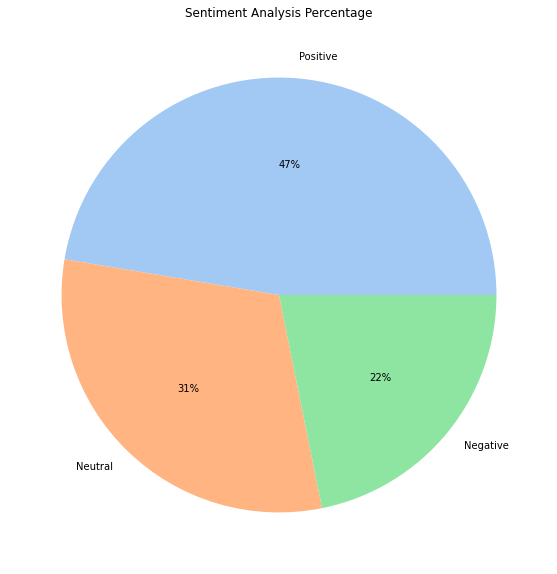

In [121]:
pos = len(epl_df[epl_df.sentiment > 0])
neg = len(epl_df[epl_df.sentiment < 0])
neu = len(epl_df[epl_df.sentiment == 0])
y = [pos, neu, neg]

plt.figure(figsize=(15,10))
plt.title('Sentiment Analysis Percentage')
palette_color = sns.color_palette('pastel')
plt.pie(y, labels=['Positive', 'Neutral', 'Negative'], colors=palette_color, autopct='%.0f%%')
plt.show()

Generating Word Cloud

In [207]:
epl_df[epl_df.sentiment > 0].content.iloc[6]

'i find it so satisfying not having to scroll an inch when looking at the table and every stat  are always their its a wonderful life for newcastle fans right now     '

In [205]:
epl_df[epl_df.sentiment < 0].content.iloc[2]

'var is utterly killing football.any joy is put on pause which takes the moment away.  '

In [45]:
def make_wordcloud(content):
    wordcloud = WordCloud(width=1600, height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(content.str.cat(sep=' '))
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Wordcloud Related To English Premier League

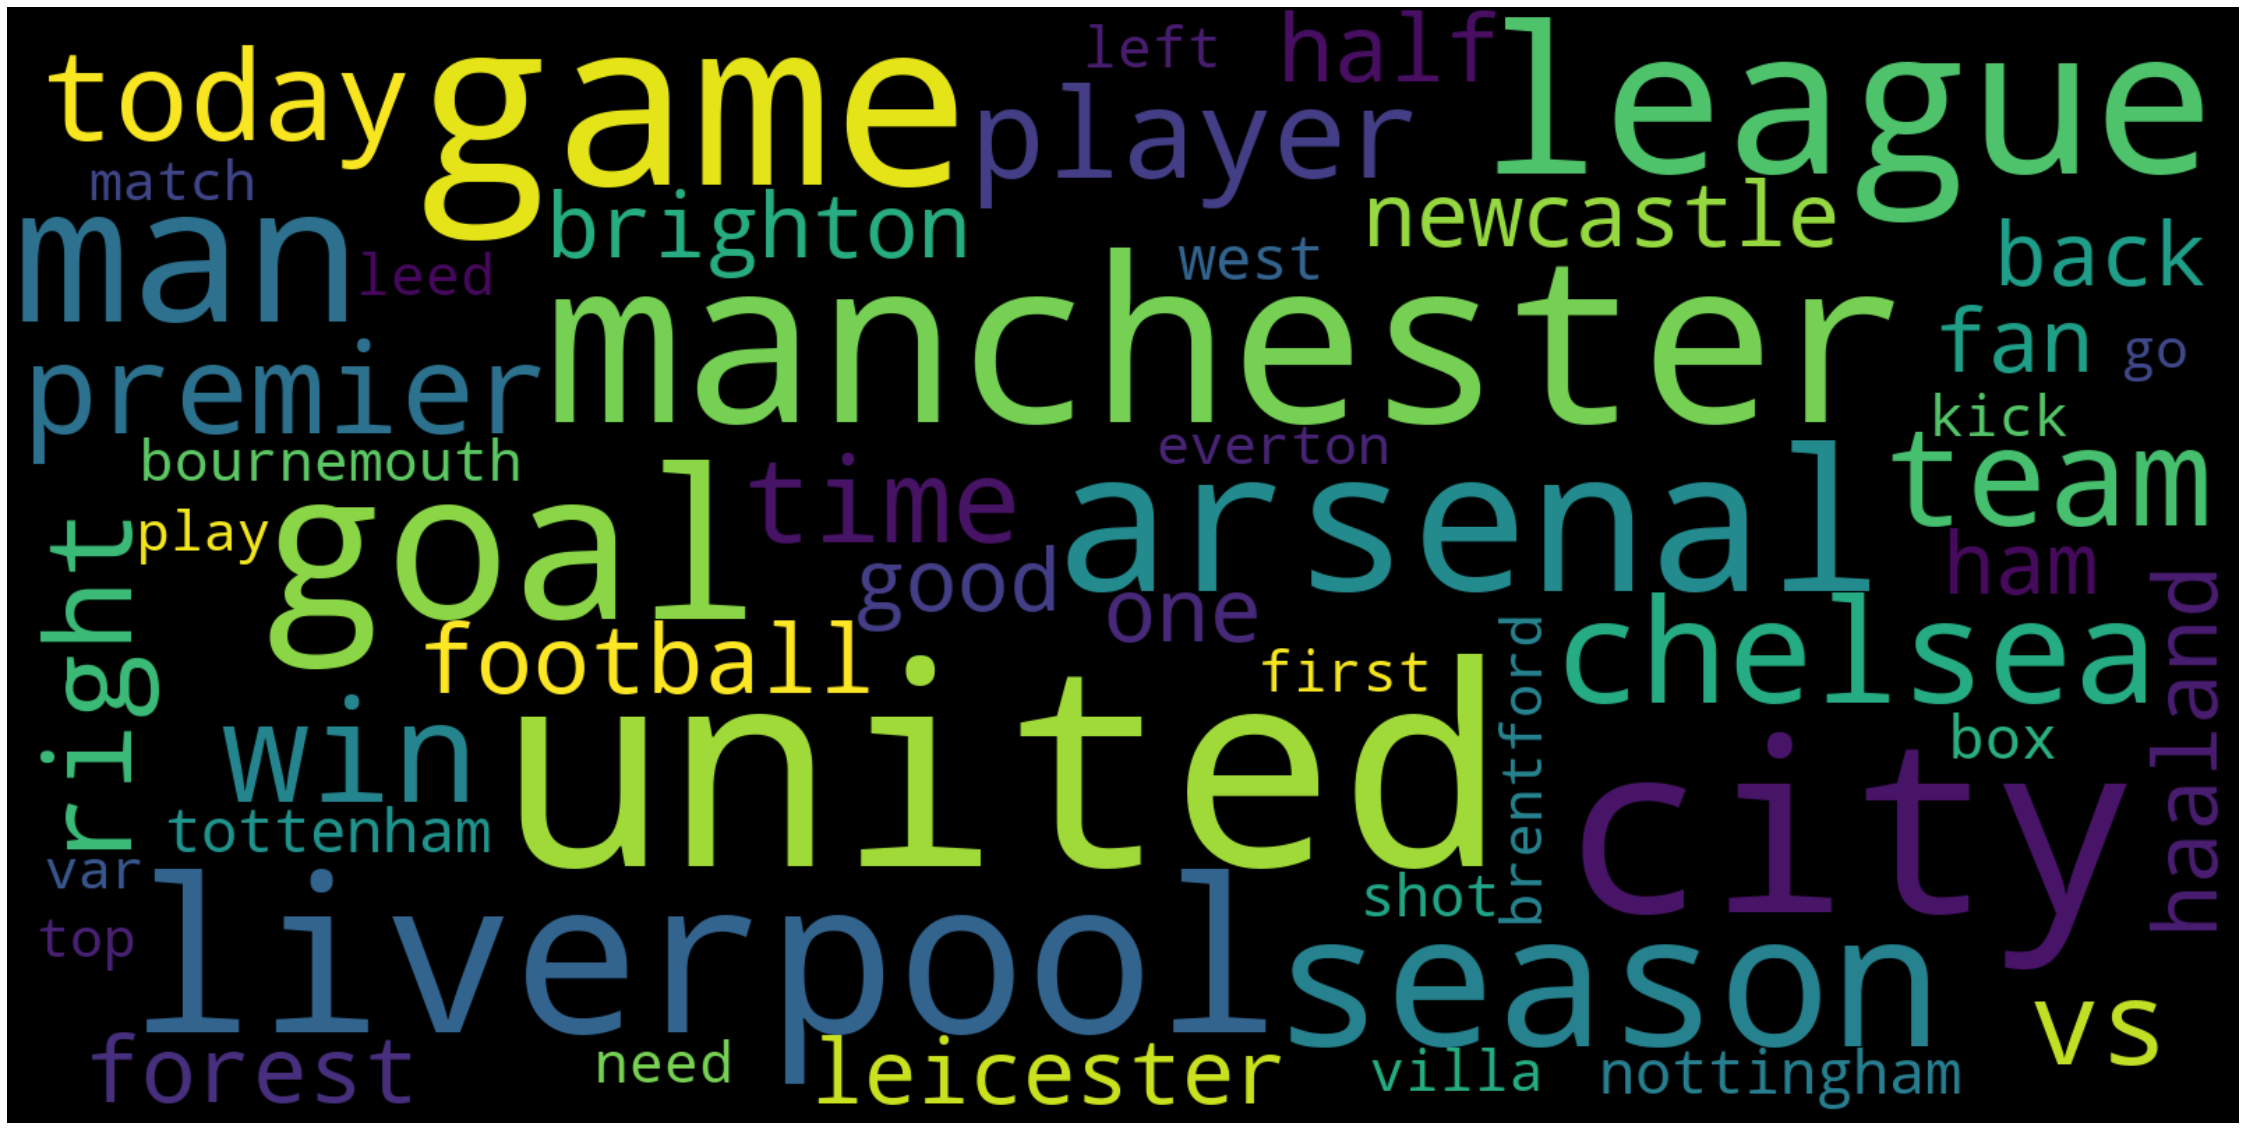

In [46]:
# Overall Wordcloud
make_wordcloud(epl_df.cleaned_content)

Wordcloud for negative sentiment tweets

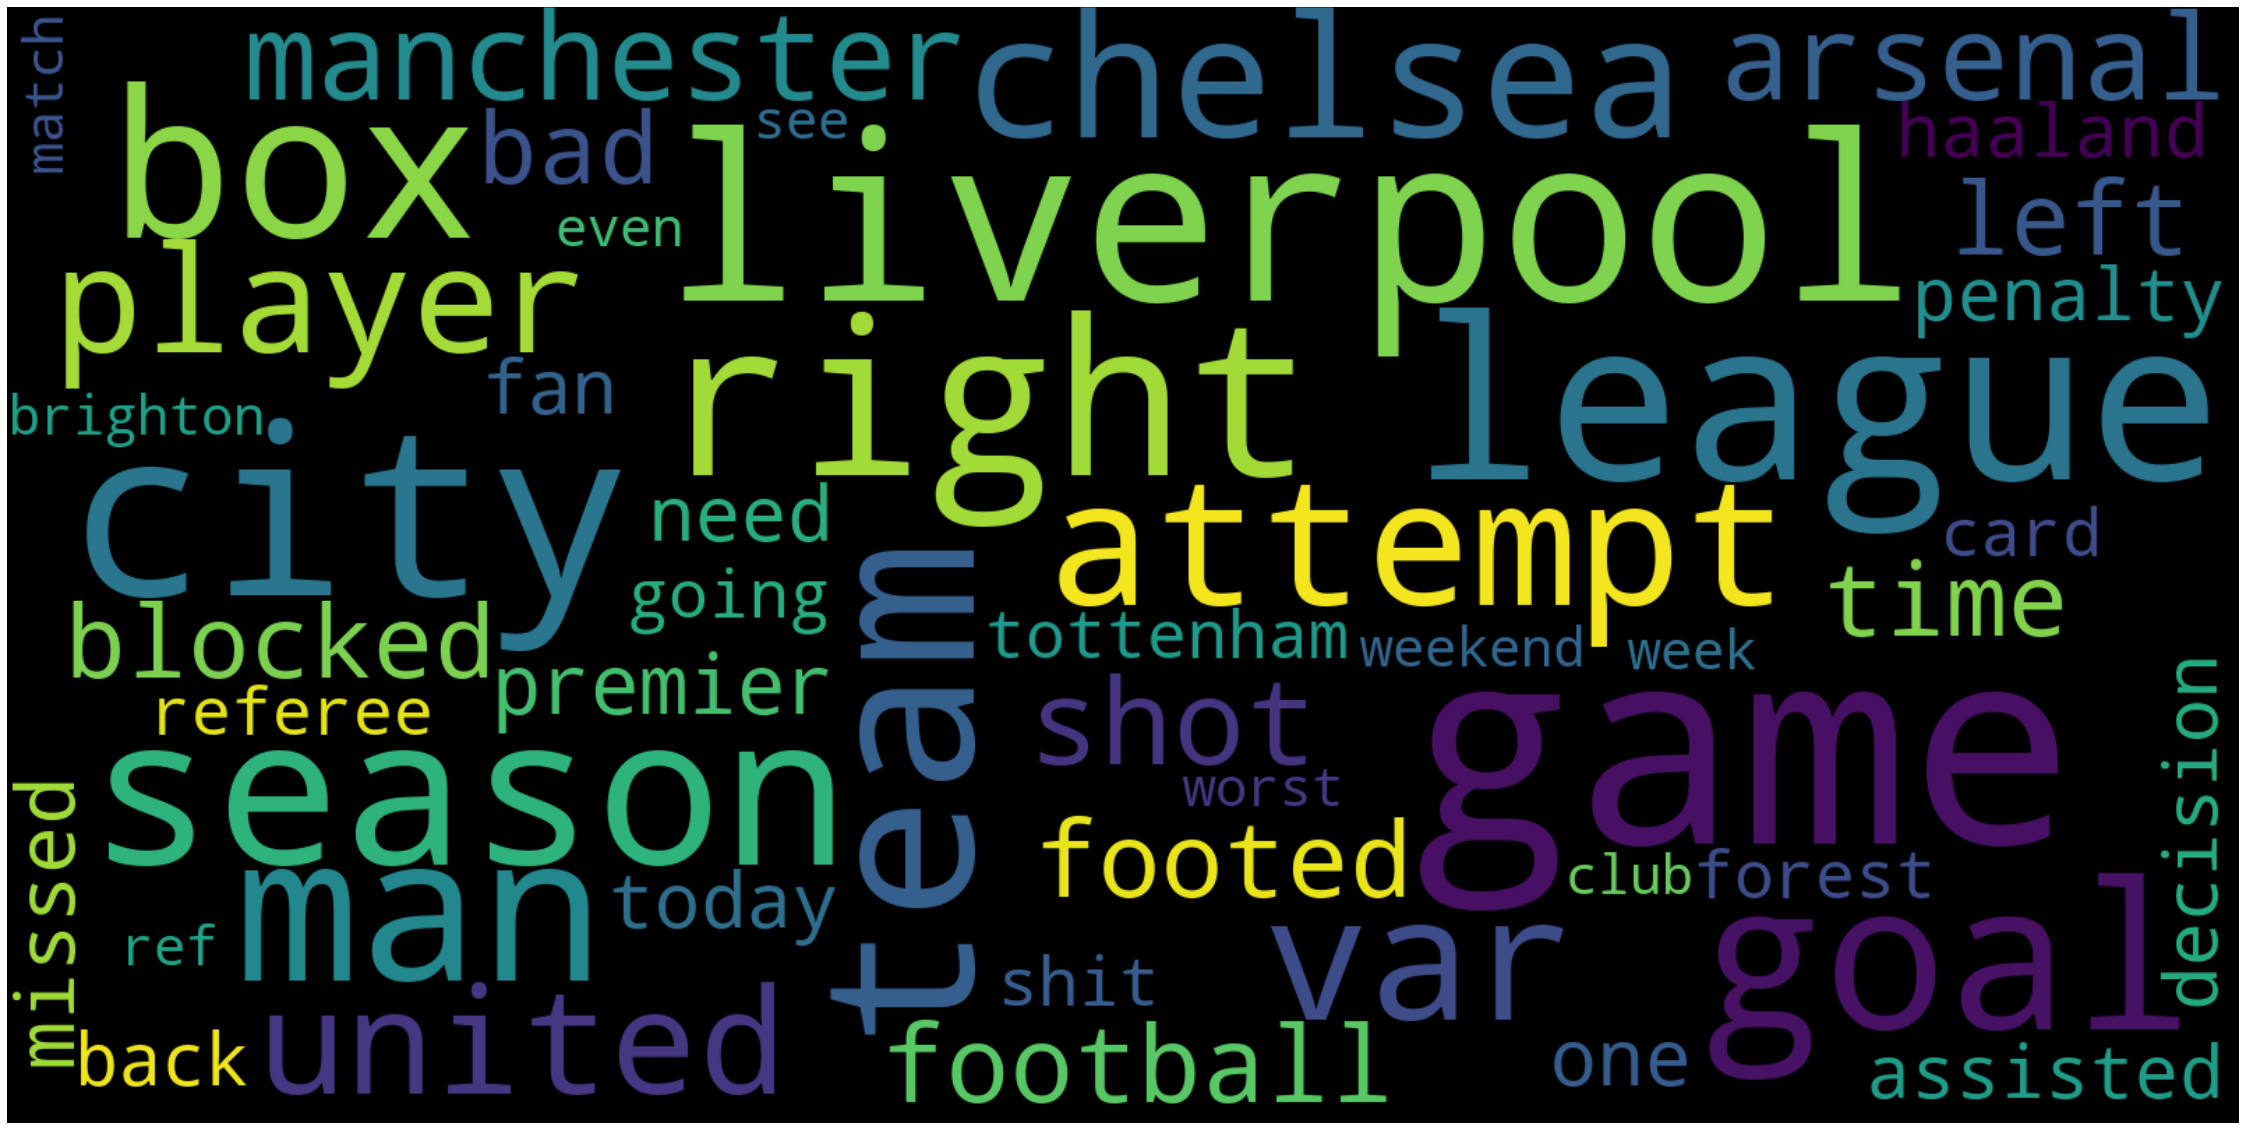

In [47]:
make_wordcloud(epl_df[epl_df.sentiment < 0].cleaned_content)

ENTITY RECOGNITION

Sapcy Install spacy and download load en_core_web_sm

Command: python -m spacy download en_core_web_lg

In [48]:
!python -m spacy download en_core_web_lg

2022-11-08 11:05:27.008618: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 17 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [49]:
nlp = spacy.load("en_core_web_lg")

In [50]:
epl_df['entities']=epl_df.content.apply(lambda x: [(ent.text, ent.label_) if (not ent.text.startswith('#')) else '' for ent in nlp(x).ents])

In [51]:
epl_df.head()

,date,content,hashtags,username,user_display_name,user_location,tokens,stopwords,punctuation,digits,cleaned_content,sentiment,entities
1,2022-10-27 09:01:19+00:00,there once was a player called walkerwhose wif...,"[FIFAWorldCup, ManCity, KyleWalker, PremierLea...",WorldCupLimerix,Rick O'Limm,,"[there, once, was, a, player, called, walkerwh...","[player, called, walkerwhose, wife, bit, porke...","[player, called, walkerwhose, wife, bit, porke...","[player, called, walkerwhose, wife, bit, porke...",player called walkerwhose wife bit porkeron di...,0.0000,"[(five, CARDINAL)]"
13,2022-10-27 08:13:18+00:00,i have 2x ticket for sale on arsenal vs nottin...,"[Arsenal, PremierLeague, Ticketmaster, Notting...",keithmat3,Keith Mati😎,"York, England","[i, have, 2x, ticket, for, sale, on, arsenal, ...","[2x, ticket, sale, arsenal, vs, nottingham, fo...","[2x, ticket, sale, arsenal, vs, nottingham, fo...","[ticket, sale, arsenal, vs, nottingham, forest...",ticket sale arsenal vs nottingham forest match...,0.3612,"[(nottingham forest, ORG)]"
15,2022-10-27 07:48:35+00:00,i got a single pare ticket for liverpool vs le...,"[LiverpoolFC, LeedsUnited, PremierLeague]",rouful3631,Rouful Moula,,"[i, got, a, single, pare, ticket, for, liverpo...","[got, single, pare, ticket, liverpool, vs, lee...","[got, single, pare, ticket, liverpool, vs, lee...","[got, single, pare, ticket, liverpool, vs, lee...",got single pare ticket liverpool vs leeds game...,0.3182,"[(liverpool, GPE), (saturday, DATE)]"
16,2022-10-27 07:30:39+00:00,fe's premier league team of the week.[gw13]tho...,"[PremierLeague, PL, footballextra]",football_extra,Football Extra,,"[fe's, premier, league, team, of, the, week, ....","[fe's, premier, league, team, week, ., [, gw13...","[fe's, premier, league, team, week, gw13, thou...","[fe's, premier, league, team, week, gw13, thou...",fe's premier league team week gw13 thoughts gk...,0.0000,"[(fe's, ORG), (week.[gw13]thoughts, NORP), (he..."
17,2022-10-27 07:27:06+00:00,can we get rid of var before it ruins football...,"[BANVAR, NOVAR, PREM, PremierLeague]",davirobinson,David Robinson,,"[can, we, get, rid, of, var, before, it, ruins...","[get, rid, var, ruins, football, ., longer, ce...","[get, rid, var, ruins, football, longer, celeb...","[get, rid, var, ruins, football, longer, celeb...",get rid var ruins football longer celebrate go...,0.6249,"[(two, CARDINAL)]"


In [52]:
ner_list = [item for sublist in epl_df.entities.to_list() for item in sublist]
df_entities = pd.DataFrame(ner_list, columns=['word', 'ner'])
df_entities

,word,ner
0,five,CARDINAL
1,nottingham forest,ORG
2,liverpool,GPE
3,saturday,DATE
4,fe's,ORG
...,...,...
101052,pdp,ORG
101053,obidents,NORP
101054,today,DATE
101055,0,CARDINAL


Organization NER Frequency

In [53]:
organization = df_entities[df_entities.ner.str.contains('ORG')]
orgainzation_sum = Counter(organization.word)
top_5 = orgainzation_sum.most_common(5)

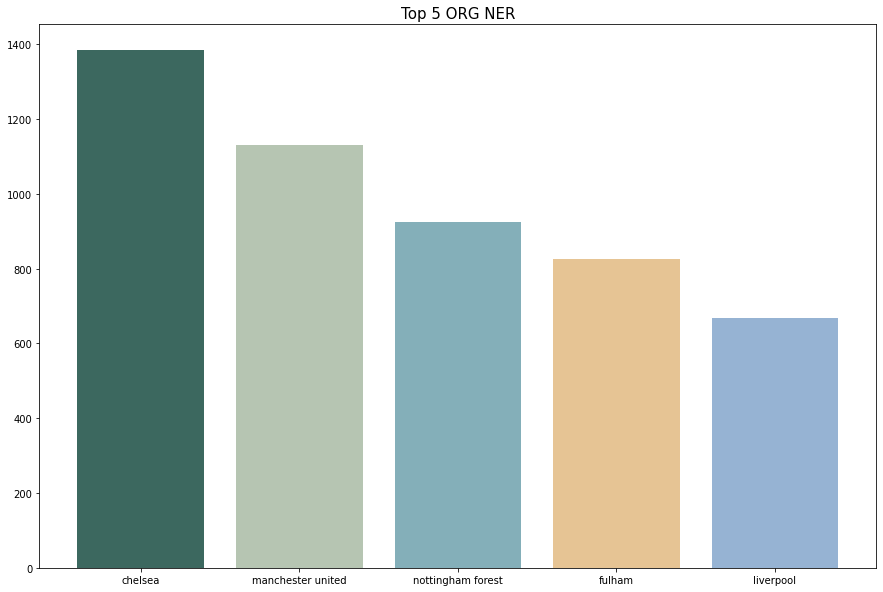

In [54]:
plt.figure(figsize=(15, 10))
org = list(zip(*top_5))[0]
occurance = list(zip(*top_5))[1]
x_pos = np.arange(len(org))

sns.set_palette("pastel")
plt.title("Top 5 ORG NER", fontsize=15)
plt.bar(x_pos, occurance,align='center', color=['#3c685f', '#b6c5b2', '#84afb9', '#e6c494', '#96b3d3'])
plt.xticks(x_pos, org)
plt.show()

PERSON NER Frequency

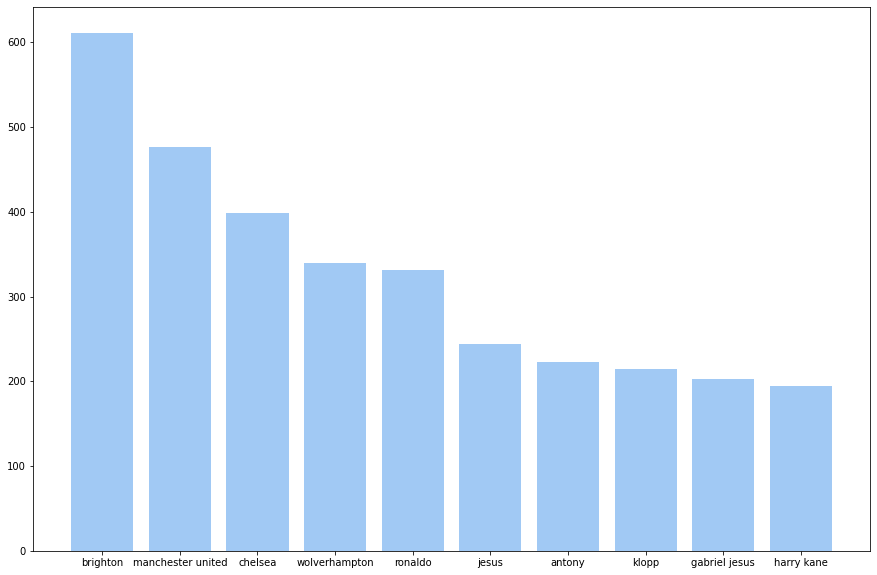

In [56]:
person = df_entities[df_entities.ner.str.contains('PERSON')]
person_sum = Counter(person.word)
top_10_person = person_sum.most_common(10)

plt.figure(figsize=(15, 10))
org = list(zip(*top_10_person))[0]
occurance = list(zip(*top_10_person))[1]
x_pos = np.arange(len(org))

plt.bar(x_pos, occurance,align='center')
plt.xticks(x_pos, org)
plt.show()

In [ ]:
df_2 = epl_df.loc[epl_df['sentiment'] != 0]
df_2.set_index(pd.DatetimeIndex(df_2['date']), inplace=True)

In [106]:
def sentiment_timely(query):
  result_df = df_2[df_2['cleaned_content'].str.contains(query)]
  result_sentiment = result_df['sentiment']
  result_sentiment = result_sentiment.resample('W-MON').mean()
  result_sentiment.dropna(inplace=True)
  return result_sentiment

Timeseries sentiment analysis for Manchester United 

Text(0, 0.5, 'Sentiment')

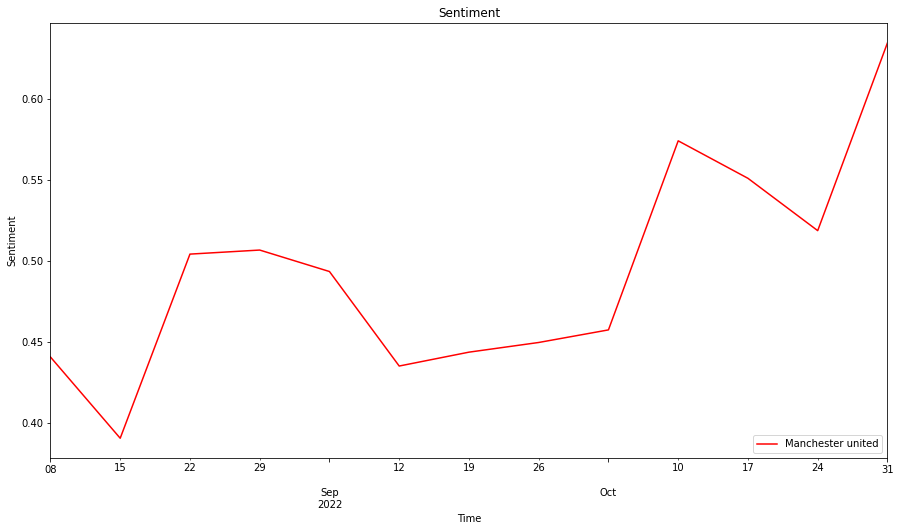

In [196]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.set_title('Sentiment')
sentiment_timely('manchester united').plot(ax=ax, color='red', label='Manchester united')
ax.legend(loc='lower right')
ax.set_xlabel('Time')
ax.set_ylabel('Sentiment')

Average Sentiment Score for the Top 5 EPL Teams

In [115]:
mc = epl_df[epl_df.content.str.contains('manchester city')]
mc_mean_sentiment = round(np.mean(mc.sentiment), 3)*100
mc_mean_sentiment

20.3

In [116]:
chelsea = epl_df[epl_df.content.str.contains('chelsea')]
chelsea_mean_sentiment = round(np.mean(chelsea.sentiment), 3)*100
chelsea_mean_sentiment

17.5

In [117]:
mu = epl_df[epl_df.content.str.contains('manchester united')]
mu_mean_sentiment = round(np.mean(mu.sentiment), 3)*100
mu_mean_sentiment

46.0

In [118]:
liverpool = epl_df[epl_df.content.str.contains('liverpool')]
liverpool_mean_sentiment = round(np.mean(liverpool.sentiment), 3)*100
liverpool_mean_sentiment

16.8

In [119]:
arsenal = epl_df[epl_df.content.str.contains('arsenal')]
arsenal_mean_sentiment = round(np.mean(arsenal.sentiment), 3)*100
arsenal_mean_sentiment

21.7

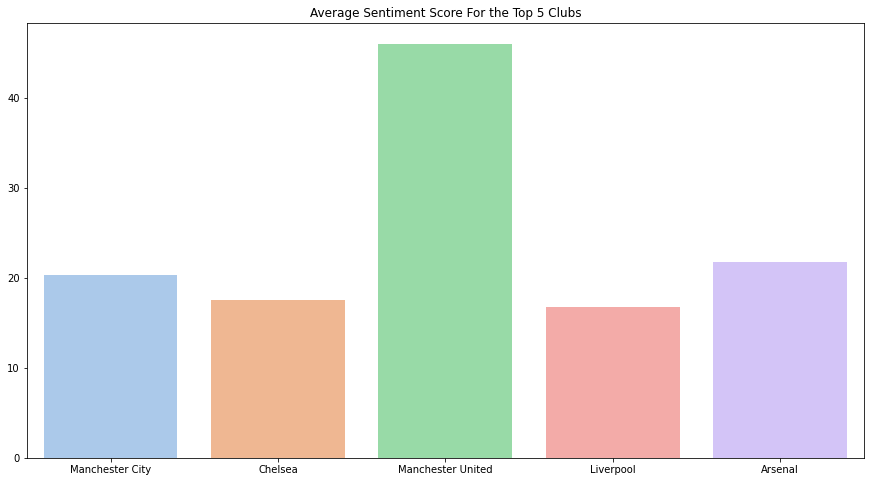

In [208]:
fig = plt.figure(figsize=(15, 8))
plt.title('Average Sentiment Score For the Top 5 Clubs')
y = [mc_mean_sentiment, chelsea_mean_sentiment, mu_mean_sentiment, liverpool_mean_sentiment, arsenal_mean_sentiment]
sns.barplot(x=['Manchester City', 'Chelsea', 'Manchester United', 'Liverpool', 'Arsenal'], y=y)

UNCOMMENT THE NEXT CELL TO GET GOOGLE COUNTRY LOCATION

- It requires the google api key
- Requires payment if it passes the Quota
- It takes time to run over all the data
- Thus, the cell is already executed once and its data is available as csv file, it will be loaded for the next task

In [124]:
#import googlemaps
# Provide the Google api key and uncomment the next line to get google geo location
#gmaps = googlemaps.Client(key=os.getenv('GOOGLE_API_KEY'))

#def get_country(location):
#    try:
#        output = gmaps.geocode(location)[0]['formatted_address'].split(',')[-1].strip()
#    except Exception as e:
#        output = f'Error: {e}'
#    return output

#epl_df['country'] = epl_df.user_location.apply(lambda x: '' if (not x.strip()) else get_country(x))
# Save the data with the country to CSV file
#epl_df.to_csv('epl.csv')

In [125]:
!wget https://github.com/HenokZegeye/Datascience-Course/blob/main/epl.csv?raw=true -O epl_country.csv

--2022-11-08 12:55:41--  https://github.com/HenokZegeye/Datascience-Course/blob/main/epl.csv?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/HenokZegeye/Datascience-Course/raw/main/epl.csv [following]
--2022-11-08 12:55:41--  https://github.com/HenokZegeye/Datascience-Course/raw/main/epl.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HenokZegeye/Datascience-Course/main/epl.csv [following]
--2022-11-08 12:55:41--  https://raw.githubusercontent.com/HenokZegeye/Datascience-Course/main/epl.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awa

In [138]:
df_country = pd.read_csv('epl_country.csv', lineterminator='\n', index_col=0)
df_country = df_country[df_country.country != 'Error: list index out of range']
df_country.shape

(45785, 8)

In [139]:
df_country = remove_unnecessary(df_country)
df_country.shape

(44675, 8)

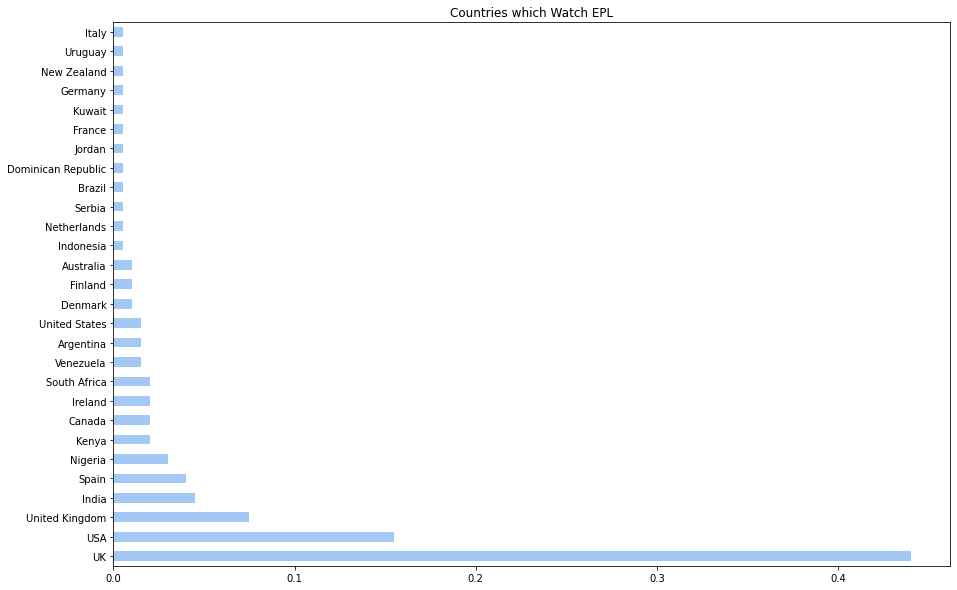

<Figure size 3600x1440 with 0 Axes>

In [211]:
plt.figure(figsize=(15, 10))
plt.title('Countries which Watch EPL')
df_country.country[df_country.country != ''].head(200).value_counts(normalize=True).plot.barh()
plt.figure(figsize=(50, 20))
plt.show()

In [149]:
df_country.dropna(inplace=True)

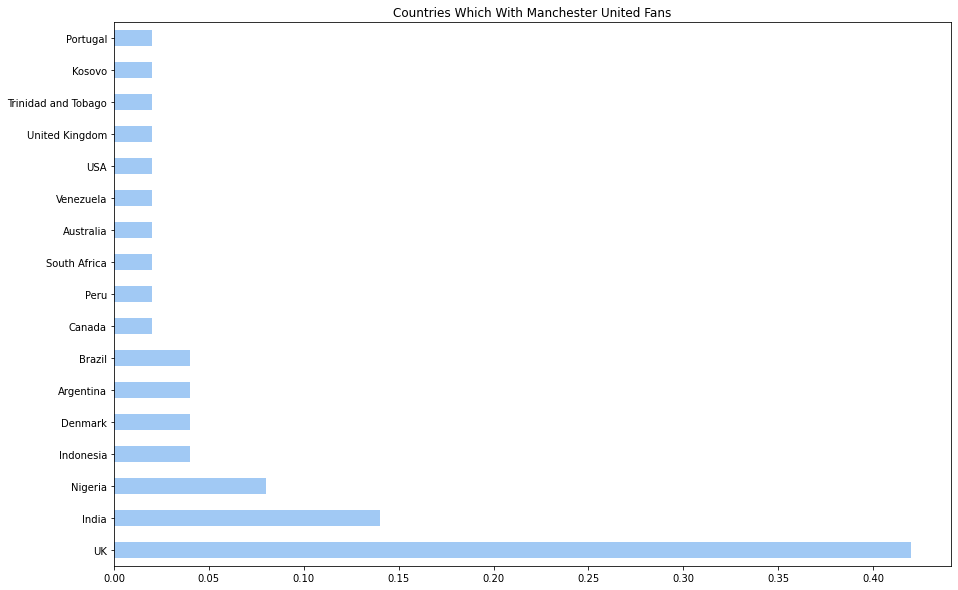

In [212]:
plt.figure(figsize=(15, 10))
plt.title('Countries Which With Manchester United Fans')
united_tweets = df_country.cleaned_content.str.contains('manchester united|mufc|manunited')
df_country[united_tweets].country[df_country.country != ''].head(50).value_counts(normalize=True).plot.barh()

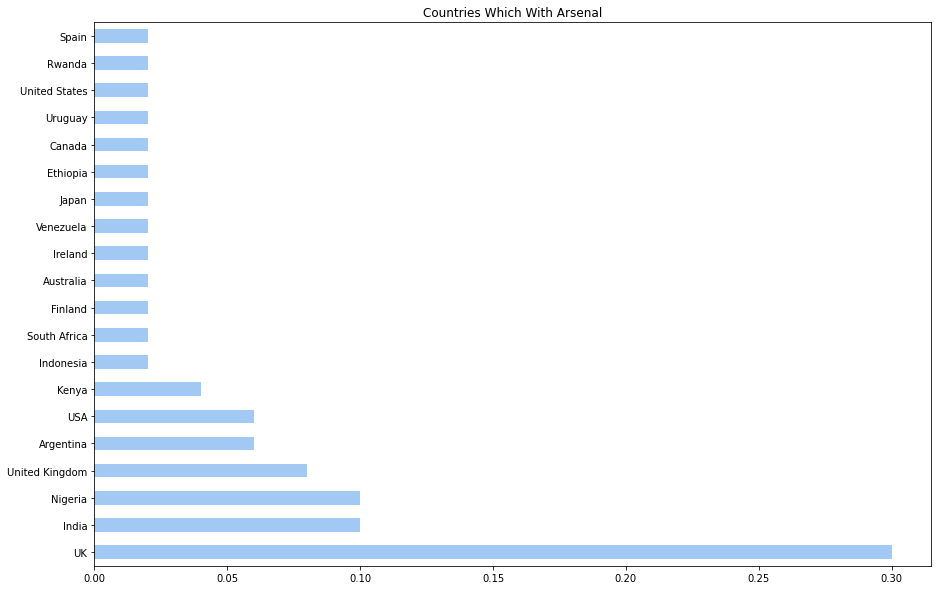

In [213]:
plt.figure(figsize=(15, 10))
plt.title('Countries Which With Arsenal')
arsenal_tweets = df_country.cleaned_content.str.contains('arsenal')
df_country[arsenal_tweets].country[df_country.country != ''].head(50).value_counts(normalize=True).plot.barh()

Network Analysis

In [153]:
!wget https://github.com/HenokZegeye/Datascience-Course/blob/main/networkOfFollowers.csv?raw=true -O net_followers.csv

--2022-11-08 13:35:14--  https://github.com/HenokZegeye/Datascience-Course/blob/main/networkOfFollowers.csv?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/HenokZegeye/Datascience-Course/raw/main/networkOfFollowers.csv [following]
--2022-11-08 13:35:14--  https://github.com/HenokZegeye/Datascience-Course/raw/main/networkOfFollowers.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HenokZegeye/Datascience-Course/main/networkOfFollowers.csv [following]
--2022-11-08 13:35:15--  https://raw.githubusercontent.com/HenokZegeye/Datascience-Course/main/networkOfFollowers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githu

GET THE FOLLOWERS USING TWEEPY

In [158]:
epl_df_net = pd.read_json('premierleague.json', lines=True)
users = [users for users, _ in epl_df_net.mentionedUsers.value_counts().items()]
top_mentioned_users = [{'id': user[0]['id'], 'displayname': user[0]['displayname'], 'username': user[0]['username']} for user in users[:11]]

In [183]:
[(user['id'], user['displayname']) for user in top_mentioned_users]

[(558797310, 'Manchester United'),
 (34613288, 'Arsenal'),
 (343627165, 'Premier League'),
 (19583545, 'Liverpool FC'),
 (22910295, 'Chelsea FC'),
 (14573900, 'Manchester City'),
 (2157651508, 'Erling Haaland'),
 (761568335138058240, 'Fantasy Premier League'),
 (121402638, 'Tottenham Hotspur'),
 (39754653, 'Nottingham Forest FC'),
 (155659213, 'Cristiano Ronaldo')]

The next cell contains a code snippet used to get the followers id for the top mentioned users using the Tweepy library.
To access the the twitter API developer account and credentials are required.
For the next task the csv file(fetched once by a developer account) will be loadded. 

In [ ]:
"""import os
consumer_key = os.getenv("API_KEY")
consumer_secret = os.getenv("API_KEY_SECRET")
access_token = os.getenv("ACCESS_TOKEN")
access_token_secret = os.getenv("ACCESS_TOKEN_SECRET")

auth = tweepy.OAuth1UserHandler(
                consumer_key,
                consumer_secret,
                access_token,
                access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

net_df = pd.DataFrame(columns=['source', 'target'])
user_id_list = [user['id'] for user in top_mentioned_users]

for uid in user_id_list:
    followers = []
    follower_list = []
    user = api.get_user(user_id=uid)
    followers_count = user.followers_count

    try:
        for page in tweepy.Cursor(api.get_follower_ids, user_id=uid).pages():
            followers.extend(page)
            if followers_count >= 5000:
                break
    except tweepy.errors.TweepyException as e:
        print('error')

    follower_list.append(followers)
    temp = pd.DataFrame(columns=['source', 'target'])
    temp['target'] = follower_list[0]
    temp['source'] = uid
    net_df = pd.concat([net_df, temp])
    net_df.to_csv("networkOfFollowers.csv")"""

In [165]:
net_df = pd.read_csv('net_followers.csv')
net_df.shape

(55000, 3)

In [166]:
G = nx.from_pandas_edgelist(net_df, 'source', 'target')

In [167]:
G.number_of_nodes()

34372

In [168]:
G_sorted = pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['nconst','degree']
G_sorted.degree.unique()

array([5000,   11,   10,    9,    8,    7,    6,    5,    4,    3,    2,
          1])

In [185]:
G_min = nx.k_core(G, 10)

In [186]:
print(f'Total nodes: {G_min.number_of_nodes()}, Total edges: {G_min.number_of_edges()},')

Total nodes: 158, Total edges: 1478,


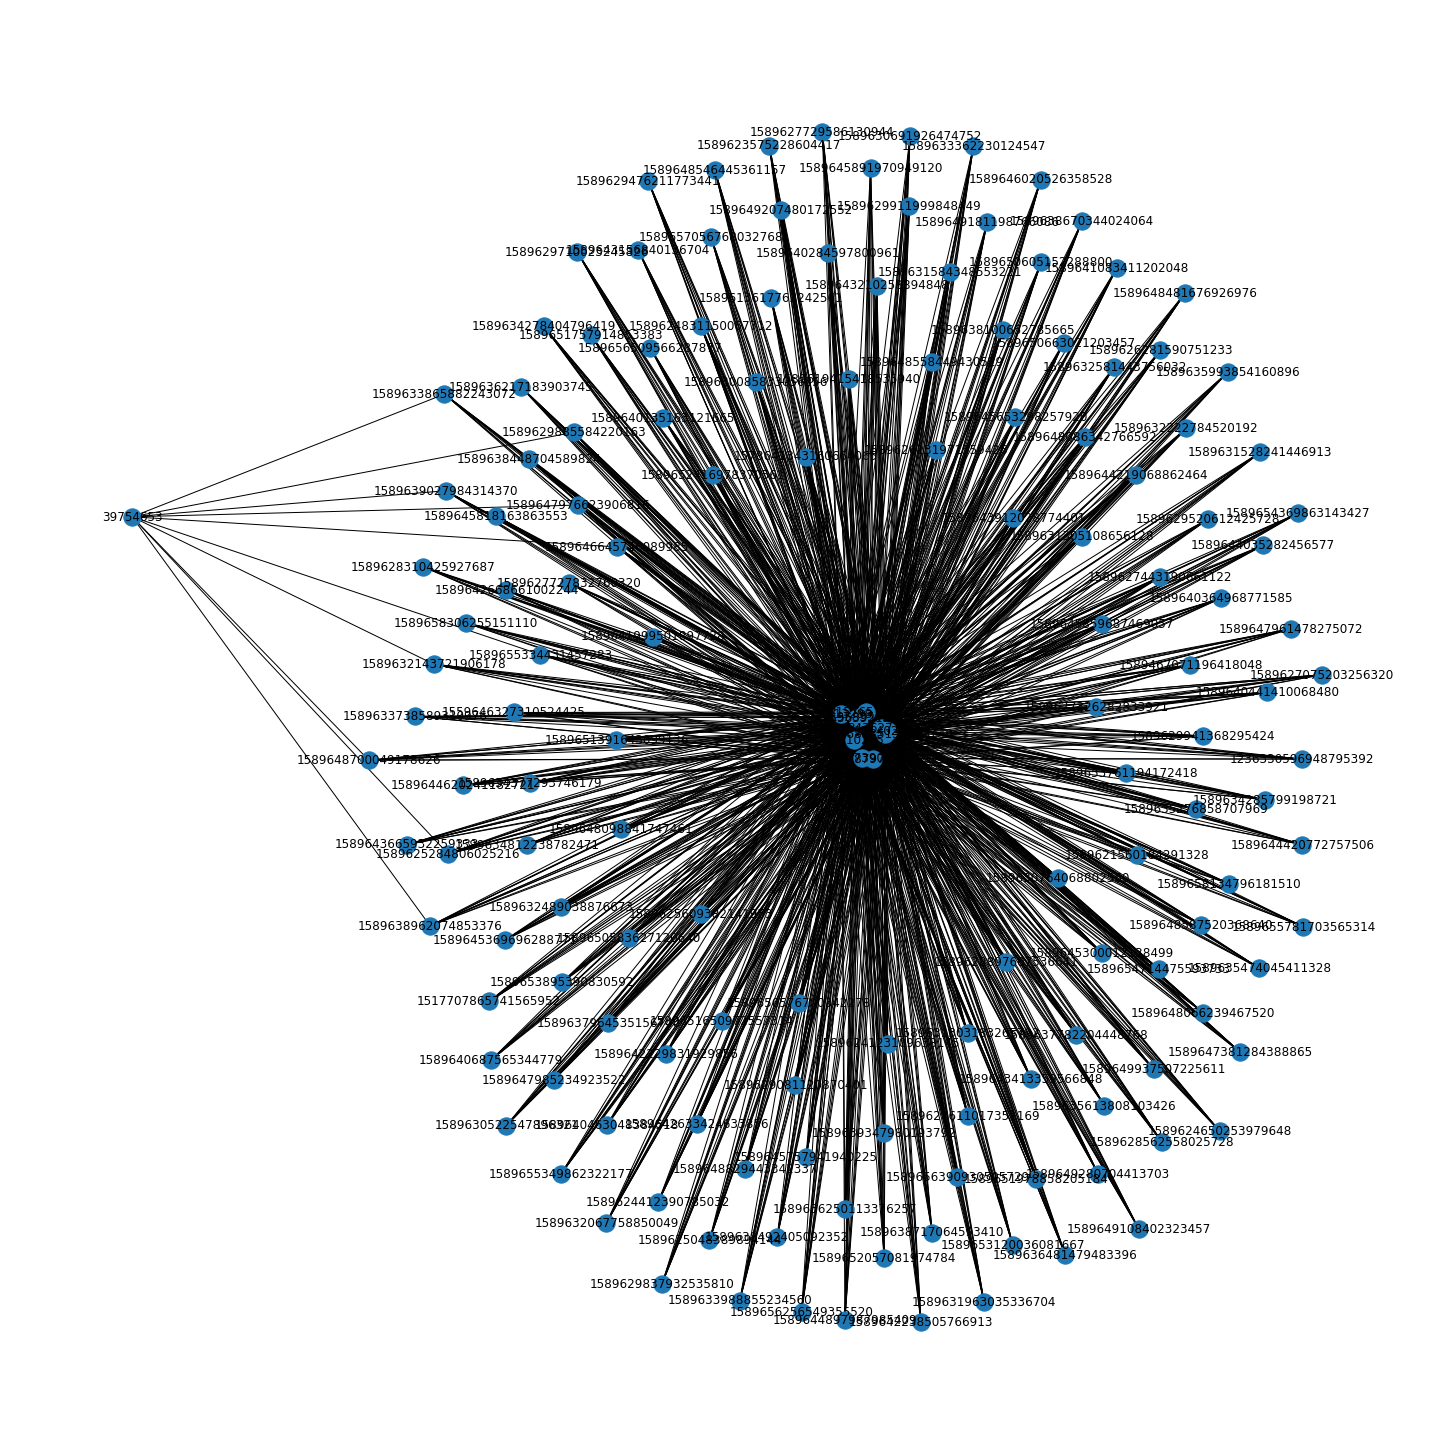

In [187]:
plt.figure(figsize=(20, 20))
nx.draw(G_min, with_labels = True)

(array([148.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.]),
 array([ 10. ,  23.7,  37.4,  51.1,  64.8,  78.5,  92.2, 105.9, 119.6,
        133.3, 147. ]),
 <a list of 10 Patch objects>)

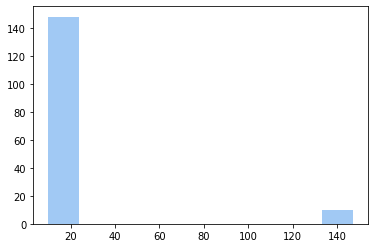

In [188]:
plt.hist([v for k,v in nx.degree(G_min)])

(array([  1.,   0., 147.,   0.,   0.,   0.,   0.,   0.,   0.,  10.]),
 array([0.35600907, 0.41442014, 0.47283121, 0.53124228, 0.58965335,
        0.64806442, 0.70647548, 0.76488655, 0.82329762, 0.88170869,
        0.94011976]),
 <a list of 10 Patch objects>)

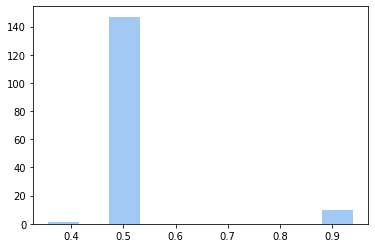

In [190]:
plt.hist(nx.centrality.closeness_centrality(G_min).values())

In [192]:
density = nx.density(G_min)
print("Network density:", density)

Network density: 0.11916471821333548
